<a href="https://colab.research.google.com/github/Linda0628/hhh/blob/main/1123_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Air Pollution Analysis

##Installing the necessary libraries

In [1]:
!pip install py-openaq

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Importing data on Cities

In [3]:
import openaq

api = openaq.OpenAQ()

status, resp = api.cities()


In [4]:
#Importing data for the US
us = api.latest(country = 'US', df=True)

/Users/linda/opt/anaconda3/envs/pp-proj2/lib/python3.8/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [5]:
#Printing out the first few rows.
us.head()

,parameter,value,unit,sourceName,country,city,location,averagingPeriod.value,averagingPeriod.unit
lastUpdated,,,,,,,,,
2021-11-06 05:00:00+00:00,pm25,7.000000,b'\xc2\xb5g/m\xc2\xb3',AirNow,US,Pittsburgh,Parkway East (Near R,3600.0,seconds
2020-12-31 04:30:00+00:00,no2,0.010495,ppm,AirNow,US,Pittsburgh,Parkway East (Near R,NaN,seconds
2020-12-31 04:30:00+00:00,co,0.303487,ppm,AirNow,US,Pittsburgh,Parkway East (Near R,NaN,seconds
2021-11-25 18:00:00+00:00,so2,0.000000,ppm,AirNow,US,Pittsburgh,Parkway East (Near R,NaN,seconds
2020-11-01 04:00:00+00:00,no,0.007021,ppm,AirNow,US,Pittsburgh,Parkway East (Near R,NaN,seconds


##Data Management

In [6]:
#Finding more about the number of columns and rows
print('The dataset has ', us.shape[1], 'columns and ', us.shape[0], 'rows.')

The dataset has  9 columns and  243 rows.


In [7]:
#Finding out about the datatypes of our dataset
us.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-11-06 05:00:00+00:00 to 2021-11-25 17:00:00+00:00
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   parameter              243 non-null    object 
 1   value                  243 non-null    float64
 2   unit                   243 non-null    object 
 3   sourceName             243 non-null    object 
 4   country                243 non-null    object 
 5   city                   243 non-null    object 
 6   location               243 non-null    object 
 7   averagingPeriod.value  238 non-null    float64
 8   averagingPeriod.unit   243 non-null    object 
dtypes: float64(2), object(7)
memory usage: 19.0+ KB


In [8]:
#Dropping the missing values in the averagingPeriod.value column to have more consistent data
us = us.dropna(subset = ['averagingPeriod.value'])

##Feature Engineering

In [9]:
#Making the index a column for more analysis
us['date and time'] = us.index

In [10]:
#Splitting the date and time into two separate columns
us['time'],us['date']= us['date and time'].apply(lambda x:x.time()), us['date and time'].apply(lambda x:x.date())
us.head(2)

,parameter,value,unit,sourceName,country,city,location,averagingPeriod.value,averagingPeriod.unit,date and time,time,date
lastUpdated,,,,,,,,,,,,
2021-11-06 05:00:00+00:00,pm25,7.000,b'\xc2\xb5g/m\xc2\xb3',AirNow,US,Pittsburgh,Parkway East (Near R,3600.0,seconds,2021-11-06 05:00:00+00:00,05:00:00,2021-11-06
2021-11-25 17:00:00+00:00,o3,0.025,ppm,AirNow,US,Houston-Sugar Land-Baytown,Houston Deer Park C3,3600.0,seconds,2021-11-25 17:00:00+00:00,17:00:00,2021-11-25


In [11]:
#Dropping the date and time column after splitting
us = us.drop(['date and time'],axis=1)

In [12]:
#Separating the date column into year, month and day
us['year'] = pd.DatetimeIndex(us['date']).year
us['month'] = pd.DatetimeIndex(us['date']).month
us['day'] = pd.DatetimeIndex(us['date']).day 

In [13]:
#Dropping the date column
us = us.drop(['date'],axis=1)
us.head(1)

,parameter,value,unit,sourceName,country,city,location,averagingPeriod.value,averagingPeriod.unit,time,year,month,day
lastUpdated,,,,,,,,,,,,,
2021-11-06 05:00:00+00:00,pm25,7.0,b'\xc2\xb5g/m\xc2\xb3',AirNow,US,Pittsburgh,Parkway East (Near R,3600.0,seconds,05:00:00,2021,11,6


## Data Analysis

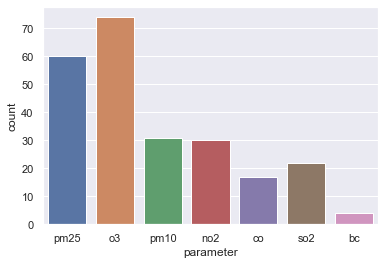

In [14]:
#Visualizing the highest number of air pollutants in the US.
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="parameter", data=us)

PM2.5 was the leading form of air pollutant in the US followed by 03 and PM10. BC was the least form of air pollutant in the US. 

In [1]:
#Finding out the cities with the highest air pollution value.
us_1 = us.groupby('value').mean()
us_1 = us_1.reset_index(inplace=True)
#Plotting the graphs using the seaborn barplot
sns.barplot(x = us['value'].head(10), y = us['city'].head(10), data=us_1)
plt.xlabel('Value')
plt.ylabel('Cities')
plt.title('The highest air pollution value of Cities in the US')
plt.figure(figsize=(12,8))
plt.show()

NameError: name 'us' is not defined

The city with the highest air pollution is:

*   Chicago
*   Pittsburgh
*   South Bend



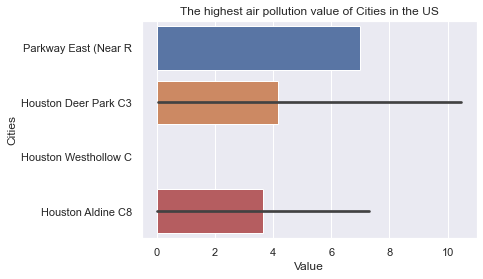

<Figure size 864x576 with 0 Axes>

In [16]:
#Finding out the location with the highest air pollution value.
us_2 = us.groupby('value').mean()
us_2 = us_2.reset_index(inplace=True)
#Plotting the graphs using the seaborn barplot
sns.barplot(x = us['value'].head(10), y = us['location'].head(10), data=us_2)
plt.xlabel('Value')
plt.ylabel('Cities')
plt.title('The highest air pollution value of Cities in the US')
plt.figure(figsize=(12,8))
plt.show()

The locations with the highest air pollution value are


*   Ogden Dunes
*   Parkway East
*   South Bend



/Users/linda/opt/anaconda3/envs/pp-proj2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


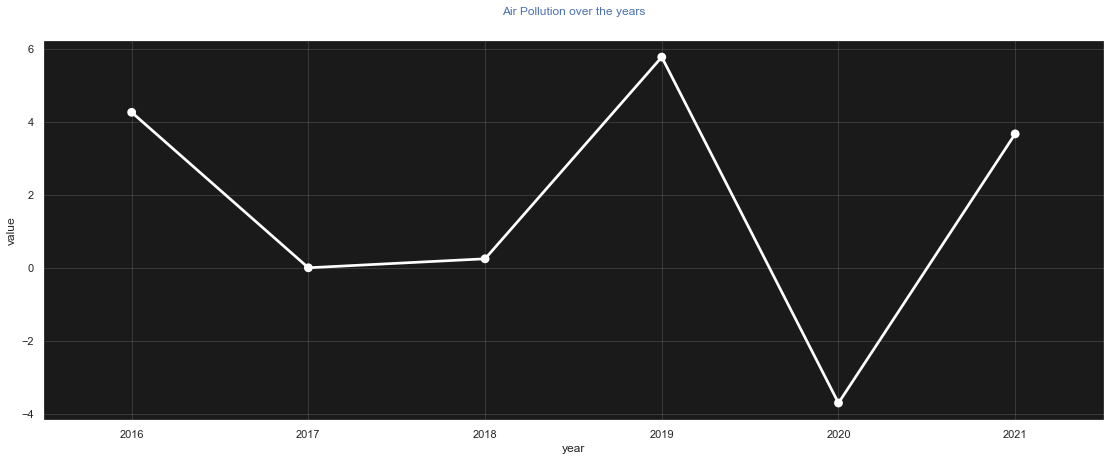

In [23]:
#Finding out the general trend of air pollution over the years.
values = us.groupby('year')['value'].mean().reset_index()
# Changing the datatype of the year column to int
values.year = values.year.astype(int) 
# Setting the figure size of the plot to 19 by 7
plt.figure(figsize=(19,7))
# Plotting a pointplot to show the trend of average price across the years
ax = sns.pointplot(values.year,values.value,color="w") 
# setting the background color to black, for contrast
ax.set_facecolor("k") 
plt.grid(True,color="grey",alpha=.3)
plt.title("Air Pollution over the years",color='b', y = 1.05) 
plt.show()

There has been a dynamic shift in air pollution value over the years with year 2017 and 2020 recording the lowest values. Though there is a general increase in air pollution over the years.

##Geo location mapping

In [24]:
#Copying the data in a different data frame
df = us.copy()

In [25]:
#Installing the necessary library
!pip install opencage

In [26]:
from opencage.geocoder import OpenCageGeocode

In [27]:
key = '0fdd2e2ef2a647158a9836b860f87f68'  # get api key from:  https://opencagedata.com


	
geocoder = OpenCageGeocode(key)

In [28]:
#Creating a for loop to map the geo locations
list_lat = []   # create empty lists

list_long = []


	
for index, row in df.iterrows(): # iterate over rows in dataframe



    City = row['city']       
    query = str(City)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)

	
# create new columns from lists    

df['lat'] = list_lat   

df['lon'] = list_long

In [29]:
#Viewing our new columns.
df.head(2)

,parameter,value,unit,sourceName,country,city,location,averagingPeriod.value,averagingPeriod.unit,time,year,month,day,lat,lon
lastUpdated,,,,,,,,,,,,,,,
2021-11-06 05:00:00+00:00,pm25,7.000,b'\xc2\xb5g/m\xc2\xb3',AirNow,US,Pittsburgh,Parkway East (Near R,3600.0,seconds,05:00:00,2021,11,6,40.441694,-79.990086
2021-11-25 17:00:00+00:00,o3,0.025,ppm,AirNow,US,Houston-Sugar Land-Baytown,Houston Deer Park C3,3600.0,seconds,17:00:00,2021,11,25,29.735500,-94.977430


In [31]:
import folium
from folium import plugins

%matplotlib inline

ModuleNotFoundError: No module named 'folium'

In [32]:
m = folium.Map([41.8781, -87.6298], zoom_start=11)
m

NameError: name 'folium' is not defined

In [ ]:
# mark each station as a point
for index, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=15,
                        popup=row['city'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [ ]:
# convert to (n, 2) nd-array format for heatmap
stationArr = df[['lat', 'lon']].values

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   


In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);